REGRESION MULTIVARIABLE

In [335]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# lab2
https://www.kaggle.com/datasets/rashadrmammadov/football-teams-price-prediction




In [336]:
# utilizado para manejos de directorios y rutas
import os
import csv
# Computacion vectorial y cientifica para python
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from sklearn import preprocessing
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# Biblioteca para la manipulación y el análisis de datos
import pandas as pd

In [337]:
# Cargamos el dataset
data = pd.read_csv('/content/gdrive/MyDrive/IA/datasets/Football_teams_price_data.csv', delimiter=',')


# Eliminar la primera columna
data = data.iloc[:, 1:]
# Identificar todas las columnas de tipo 'object' excepto la última columna
object_columns = data.iloc[:, :].select_dtypes(include=['object']).columns
# Eliminar las columnas de tipo 'object'
data = data.drop(columns=object_columns)




In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TotalGoalsLastSeason          50000 non-null  int64  
 1   MatchesWonLastSeason          50000 non-null  int64  
 2   MatchesDrawnLastSeason        50000 non-null  int64  
 3   MatchesLostLastSeason         50000 non-null  int64  
 4   TotalGoalsConcededLastSeason  50000 non-null  int64  
 5   TotalRevenueLastSeason        50000 non-null  float64
 6   StadiumCapacity               50000 non-null  int64  
 7   AverageAttendance             50000 non-null  float64
 8   TransferSpendingLastSeason    50000 non-null  float64
 9   TransferIncomeLastSeason      50000 non-null  float64
 10  NumberOfTrophies              50000 non-null  int64  
 11  MarketValueOfSquad            50000 non-null  float64
 12  AveragePlayerMarketValue      50000 non-null  float64
 13  Y

In [339]:
cols = list(data.columns)

# Verificar si la longitud de la lista es suficiente para el intercambio
if len(cols) >= 6:
    # Intercambiar las posiciones de las columnas 2 y 6 (índices 1 y 5)
    cols[12], cols[13] = cols[13], cols[12]

    # Reordenar el DataFrame
    data = data[cols]
else:
    print("No hay suficientes columnas para intercambiar.")

In [340]:
# Seleccionamos las columnas independientes (X) y dependiente(y)
X = data.iloc[:, 0:13]
y = data.iloc[:, -1]
m = y.size

In [341]:

print(y)


0        15.847841
1        26.731697
2        21.365171
3        21.483504
4        26.938414
           ...    
49995    45.316735
49996    18.867344
49997    44.213728
49998    33.942946
49999    15.094618
Name: AveragePlayerMarketValue, Length: 50000, dtype: float64


In [342]:
display(data)
data.info()

,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,YouthAcademyRating,AveragePlayerMarketValue
0,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,14.361253,15.847841
1,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,23.967076,26.731697
2,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,64.309831,21.365171
3,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,82.352127,21.483504
4,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,90.614463,26.938414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,93,27,2,33,44,311.988876,69112,41021.316020,50.294379,131.102374,39,302.667018,26.776585,45.316735
49996,93,20,36,22,70,360.856254,56046,42936.194438,40.913480,69.679081,47,858.797181,73.354701,18.867344
49997,88,34,10,4,57,63.894436,42195,32554.899828,32.229077,53.146753,46,565.281592,36.764740,44.213728
49998,78,22,15,3,70,92.374679,63261,89923.247455,69.108758,64.736750,12,434.747915,61.849402,33.942946


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TotalGoalsLastSeason          50000 non-null  int64  
 1   MatchesWonLastSeason          50000 non-null  int64  
 2   MatchesDrawnLastSeason        50000 non-null  int64  
 3   MatchesLostLastSeason         50000 non-null  int64  
 4   TotalGoalsConcededLastSeason  50000 non-null  int64  
 5   TotalRevenueLastSeason        50000 non-null  float64
 6   StadiumCapacity               50000 non-null  int64  
 7   AverageAttendance             50000 non-null  float64
 8   TransferSpendingLastSeason    50000 non-null  float64
 9   TransferIncomeLastSeason      50000 non-null  float64
 10  NumberOfTrophies              50000 non-null  int64  
 11  MarketValueOfSquad            50000 non-null  float64
 12  YouthAcademyRating            50000 non-null  float64
 13  A

In [343]:
# Funcion de normalizacion de caracteristicas, para mejorar el rendimiento
def  featureNormalize(X):
    # una copia de X para almacenar los datos normalizados
    X_norm = X.copy()
    # vector donde se almacenara la media de cada caracteristica
    mu = np.zeros(X.shape[1])
    # vector donde se almacenara la desviacion estandar de cada caracteristica
    sigma = np.zeros(X.shape[1])

    # calcular la media de cada caracteristica
    mu = np.mean(X, axis = 0)
    # calcular la desviacion estandar
    #X = np.array([[2104, 3, 399900],
              #[1600, 3, 329900],
              #[2400, 3, 369000],
              #[1416, 2, 232000]])
    # la media de la primera columna es de 1880
    # Desviaciones: [2104 - 1880, 1600 - 1880, 2400 - 1880, 1416 - 1880] = [224, -280, 520, -464]
    # Cuadrado de desviaciones: [224², -280², 520², -464²] = [50176, 78400, 270400, 215296]
    # Media de los cuadrados: (50176 + 78400 + 270400 + 215296) / 4 = 153568
    # Desviación estándar: sqrt(153568) ≈ 392
    sigma = np.std(X, axis = 0)
    # calculo de los datos normalizados:
    # [[ 0.571,  0.577,  1.067],
    # [-0.714,  0.577, -0.039],
    # [ 1.327,  0.577,  0.581],
    # [-1.184, -1.731, -1.609]]
    # Este proceso asegura que cada característica en X tenga una media de 0
    # y una desviación estándar de 1, facilitando la comparación y el entrenamiento de modelos.
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [344]:
# Llama a la funcion featureNormalize con el parametro X para obtener los datos normalizados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print(X_norm)

Media calculada:
 TotalGoalsLastSeason               59.343160
MatchesWonLastSeason               18.425460
MatchesDrawnLastSeason             18.604460
MatchesLostLastSeason              18.478100
TotalGoalsConcededLastSeason       59.538680
TotalRevenueLastSeason            274.506391
StadiumCapacity                 54854.567880
AverageAttendance               47425.311150
TransferSpendingLastSeason         99.845519
TransferIncomeLastSeason          100.406919
NumberOfTrophies                   24.584640
MarketValueOfSquad                505.104996
YouthAcademyRating                 50.000278
dtype: float64
Desviación estandar calculada:
 TotalGoalsLastSeason               23.095501
MatchesWonLastSeason               10.955331
MatchesDrawnLastSeason             10.980152
MatchesLostLastSeason              10.996801
TotalGoalsConcededLastSeason       23.049552
TotalRevenueLastSeason            130.149193
StadiumCapacity                 25986.089796
AverageAttendance               245

In [345]:
# añadimos una columna de unos como primera columna en X
# el termino de sesgo es un valor constante que se añade
# a la ecuación de predicción para ajustar la línea de
# regresión de manera que se alinee mejor con los datos observados
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [346]:
print(X)

[[ 1.         -1.35711107 -0.2213954  ...  1.69242992  0.72908866
  -1.23628999]
 [ 1.          1.28409599 -0.58651444 ...  0.92992922 -0.93712405
  -0.90307149]
 [ 1.         -0.70763393 -1.40803227 ...  0.92992922 -0.33023388
   0.49638723]
 ...
 [ 1.          1.24079751  1.42164026 ...  1.48447518  0.21006061
  -0.45913051]
 [ 1.          0.80781275  0.32628315 ... -0.87234516 -0.245598
   0.41103686]
 [ 1.          0.07173865  0.8739617  ...  1.2072022  -1.72140524
  -0.69553046]]


In [347]:
# Esta funcion calcula el costo, el costo mide la diferencia entre las predicciones realizadas por el modelo y los
# valores reales observados en los datos.
def computeCostMulti(X, y, theta):
    # almacenamos en m la cantidad de filas que tiene y
    m = y.shape[0]
    # variable que almacenara el valor del costo
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [348]:
# Funcion descenso de la gradiente, ajusta los parametros theta del modelo de regresion de manera que se minimice la funcion de costo
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # almacenamos en m la cantidad de filas que tiene y
    m = y.shape[0]
    # se realiza una copia de theta para evitar modificar el vector original fuera de la funcion
    # las thetas son los parametros o coeficientes que determinan la relacion entre variables dependientes e independientes
    # Este valor representa cuánto cambia el precio de la casa por cada unidad adicional de tamaño.
    # Si 𝜃1 es positivo, significa que a medida que aumenta el tamaño de la casa, también aumenta el precio.
    # el objetivo es encontrar una relación lineal entre las características de entrada y la salida
    theta = theta.copy()
    # una lista que almacenara el valor de la funcion de costo en cada iteracion
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # Después de actualizar theta, se calcula el costo actual con computeCostMulti y se guarda en J_history.
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

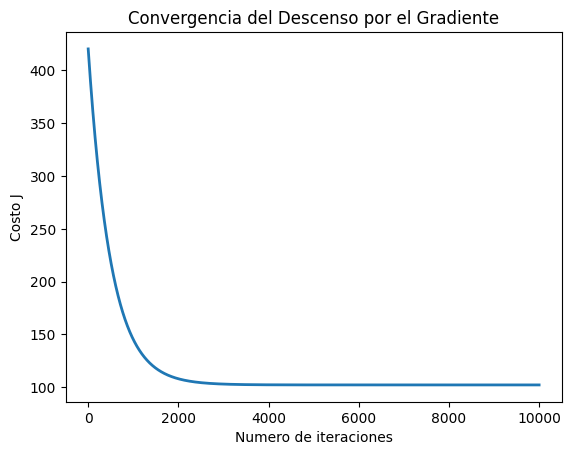

theta calculado por el descenso por el gradiente: [ 2.52480963e+01  7.91592805e-02 -2.26632671e-02 -5.91224015e-02
  9.14894581e-02  2.23398772e-02 -1.68310120e-03  4.52280425e-02
  3.59480374e-02 -1.05072532e-02 -3.59088335e-02 -1.44774463e-02
  6.43175088e-02 -1.94435683e-02]
Prueba de prediccion: $25


In [349]:
# Elegir algun valor para alpha
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
X_array = [1,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,23.967076]
X_array[1:14] = (X_array[1:14] - mu) / sigma
Precio = np.dot(X_array, theta)
print('Prueba de prediccion: ${:.0f}'.format(Precio))



In [350]:
X_array = [1,89,12,35,31,84,264.85040216224945,15307,46172.73888195951,125.4419523276792,7.679349174887529,38,23.967075752646316,26]
X_array[1:14] = (X_array[1:14] - mu) / sigma
Precio = np.dot(X_array, theta)
print('Prueba de prediccion: ${:.0f}'.format(Precio))

Prueba de prediccion: $25


In [351]:
# imprimimos los datos normalizados de X_array
X_array[1:14]

[1.2840959867161115,
 -0.586514440032822,
 1.4931979692734574,
 1.1386856575575677,
 1.0612492434189251,
 -0.07419169166800962,
 -1.5218745178598179,
 -0.05096234792386801,
 0.4438722104999695,
 -1.6095944413455152,
 0.9299292165334171,
 -1.6795254706500848,
 -0.8325509318991493]

ECUACION DE LA NORMAL

In [352]:
# utilizado para manejos de directorios y rutas
import os
import csv
# Computacion vectorial y cientifica para python
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from sklearn import preprocessing
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# Biblioteca para la manipulación y el análisis de datos
import pandas as pd

In [353]:
# Cargamos el dataset
data = pd.read_csv('/content/gdrive/MyDrive/IA/datasets/Football_teams_price_data.csv', delimiter=',')


# Eliminar la primera columna
data = data.iloc[:, 1:]
# Identificar todas las columnas de tipo 'object' excepto la última columna
object_columns = data.iloc[:, :].select_dtypes(include=['object']).columns
# Eliminar las columnas de tipo 'object'
data = data.drop(columns=object_columns)


In [354]:
# Seleccionamos las columnas independientes (X) y dependiente(y)
X = data.iloc[:, 0:13]
y = data.iloc[:, -1]
m = y.size

In [355]:
print(X.head())

   TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  \
0                    28                    16                      36   
1                    89                    12                      35   
2                    43                     3                       9   
3                    84                    19                      19   
4                    36                    36                      10   

   MatchesLostLastSeason  TotalGoalsConcededLastSeason  \
0                     20                            51   
1                     31                            84   
2                     28                            72   
3                     34                            22   
4                      9                            80   

   TotalRevenueLastSeason  StadiumCapacity  AverageAttendance  \
0              337.552001            55766        5229.742720   
1              264.850402            15307       46172.738882   
2              36

In [356]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [357]:
# Funcion de la ecuacion de la normal, obtenemos valores optimos
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [358]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))
X_array = [1,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,23.967076]
price = np.dot(X_array, theta)

print('Precio predecido para una casa (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 5.10892273e+01 -4.50876830e-03 -7.52445889e-03 -3.95908488e-03
 -1.97086306e-02 -3.07199028e-03  3.92164798e-04 -7.33899412e-06
  3.46317210e-06  8.69158265e-04  2.36730553e-03 -1.02471642e-03
 -3.19498791e-04 -2.74166599e-03]
Precio predecido para una casa (usando la ecuación de la normal): $50


REGRESION POLINOMIAL

In [4]:
# utilizado para manejos de directorios y rutas
import os
import csv
# Computacion vectorial y cientifica para python
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from sklearn import preprocessing
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# Biblioteca para la manipulación y el análisis de datos
import pandas as pd

In [5]:
# Cargamos el dataset
data = pd.read_csv('/content/gdrive/MyDrive/IA/datasets/Football_teams_price_data.csv', delimiter=',')


# Eliminar la primera columna
data = data.iloc[:, 1:]
# Identificar todas las columnas de tipo 'object' excepto la última columna
object_columns = data.iloc[:, :].select_dtypes(include=['object']).columns
# Eliminar las columnas de tipo 'object'
data = data.drop(columns=object_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TotalGoalsLastSeason          50000 non-null  int64  
 1   MatchesWonLastSeason          50000 non-null  int64  
 2   MatchesDrawnLastSeason        50000 non-null  int64  
 3   MatchesLostLastSeason         50000 non-null  int64  
 4   TotalGoalsConcededLastSeason  50000 non-null  int64  
 5   TotalRevenueLastSeason        50000 non-null  float64
 6   StadiumCapacity               50000 non-null  int64  
 7   AverageAttendance             50000 non-null  float64
 8   TransferSpendingLastSeason    50000 non-null  float64
 9   TransferIncomeLastSeason      50000 non-null  float64
 10  NumberOfTrophies              50000 non-null  int64  
 11  MarketValueOfSquad            50000 non-null  float64
 12  AveragePlayerMarketValue      50000 non-null  float64
 13  Y

In [6]:
# Seleccionamos las columnas independientes (X) y dependiente(y)
X = data.iloc[:, 0:13]
y = data.iloc[:, -1]
m = y.size

In [7]:
print(X)
print(y)
print(m)

       TotalGoalsLastSeason  MatchesWonLastSeason  MatchesDrawnLastSeason  \
0                        28                    16                      36   
1                        89                    12                      35   
2                        43                     3                       9   
3                        84                    19                      19   
4                        36                    36                      10   
...                     ...                   ...                     ...   
49995                    93                    27                       2   
49996                    93                    20                      36   
49997                    88                    34                      10   
49998                    78                    22                      15   
49999                    61                    28                      17   

       MatchesLostLastSeason  TotalGoalsConcededLastSeason  \
0            

In [8]:
X = np.concatenate([X, X * X], axis=1)

In [9]:
print(X)

[[2.80000000e+01 1.60000000e+01 3.60000000e+01 ... 2.40100000e+03
  5.09751550e+05 2.51154078e+02]
 [8.90000000e+01 1.20000000e+01 3.50000000e+01 ... 1.44400000e+03
  5.60007111e+04 7.14583603e+02]
 [4.30000000e+01 3.00000000e+00 9.00000000e+00 ... 1.44400000e+03
  1.68511939e+05 4.56470517e+02]
 ...
 [8.80000000e+01 3.40000000e+01 1.00000000e+01 ... 2.11600000e+03
  3.19543278e+05 1.95485378e+03]
 [7.80000000e+01 2.20000000e+01 1.50000000e+01 ... 1.44000000e+02
  1.89005750e+05 1.15212358e+03]
 [6.10000000e+01 2.80000000e+01 1.70000000e+01 ... 1.76400000e+03
  1.43273074e+02 2.27847504e+02]]


In [10]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 50000
Número de columnas: 26


In [11]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [12]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.80000000e+01 1.60000000e+01 3.60000000e+01 ... 2.40100000e+03
  5.09751550e+05 2.51154078e+02]
 [8.90000000e+01 1.20000000e+01 3.50000000e+01 ... 1.44400000e+03
  5.60007111e+04 7.14583603e+02]
 [4.30000000e+01 3.00000000e+00 9.00000000e+00 ... 1.44400000e+03
  1.68511939e+05 4.56470517e+02]
 ...
 [8.80000000e+01 3.40000000e+01 1.00000000e+01 ... 2.11600000e+03
  3.19543278e+05 1.95485378e+03]
 [7.80000000e+01 2.20000000e+01 1.50000000e+01 ... 1.44000000e+02
  1.89005750e+05 1.15212358e+03]
 [6.10000000e+01 2.80000000e+01 1.70000000e+01 ... 1.76400000e+03
  1.43273074e+02 2.27847504e+02]]
Media calculada: [5.93431600e+01 1.84254600e+01 1.86044600e+01 1.84781000e+01
 5.95386800e+01 2.74506391e+02 5.48545679e+04 4.74253111e+04
 9.98455193e+01 1.00406919e+02 2.45846400e+01 5.05104996e+02
 2.52492369e+01 4.05501280e+03 4.59516860e+02 4.66689660e+02
 4.62369820e+02 4.07613628e+03 9.22925711e+04 3.68430048e+09
 2.85325720e+09 1.32945208e+04 1.34003781e+04 8.12520240e+02
 3.37197570e+05 8

In [13]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [14]:
print(X)

[[ 1.         -1.35711107 -0.2213954  ...  2.17199593  0.57763269
  -0.79323948]
 [ 1.          1.28409599 -0.58651444 ...  0.86344913 -0.94131992
  -0.17101952]
 [ 1.         -0.70763393 -1.40803227 ...  0.86344913 -0.56468321
  -0.517573  ]
 ...
 [ 1.          1.24079751  1.42164026 ...  1.78230331 -0.05909859
   1.49421935]
 [ 1.          0.80781275  0.32628315 ... -0.91409615 -0.4960792
   0.41644004]
 [ 1.          0.07173865  0.8739617  ...  1.30099874 -1.12830536
  -0.82453186]]


In [15]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [16]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [17]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 50000
Número de columnas: 27


theta calculado por el descenso por el gradiente: [ 4.99980196e+01  9.16832661e-02 -2.82234318e-01 -1.45196461e-01
 -1.52129341e-01 -1.92118892e-02  1.24164285e-01 -2.78738516e-01
 -3.91660638e-02 -8.84172423e-02  2.35392341e-01 -2.11789697e-02
 -3.06247114e-01  1.39080616e-01 -2.13121769e-01  2.28517163e-01
  1.16491345e-01 -6.29922771e-02 -5.46029256e-02 -8.37359332e-02
  1.07540375e-01  1.35690188e-01  1.53693687e-01 -1.17683061e-01
  7.71192844e-03  2.45684565e-01 -1.98487386e-01]
Precio predecido de una casa (usando el descenso por el gradiente): $51


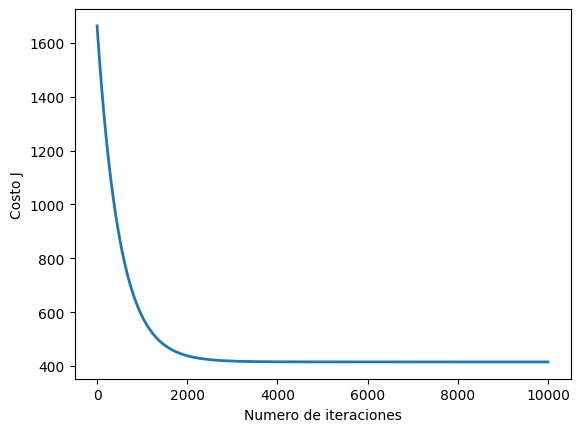

In [19]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(27)
theta, J_history = gradientDescentPoly(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1,36,	36,	10,	9,	80,	480.928532,	78563,	10940.950513,	14.881518,	188.768072,	11,
562.114099,	90.614463,26,	36,	10,	9,	65,	480.928532,	78563,	10940.950513,	14.881518,	188.768072,	11,	562.114099,	78.614463	]
X_array[1:27] = (X_array[1:27] - mu) / sigma
precio = np.dot(X_array, theta)

print('Precio predecido de una casa (usando el descenso por el gradiente): ${:.0f}'.format(precio))

In [20]:
X_array = [1,36,	36,	10,	9,	80,	480.928532,	78563,	10940.950513,	14.881518,	188.768072,	11,	562.114099,	90.614463,36,	36,	10,	9,	80,	480.928532,	78563,	10940.950513,	14.881518,	188.768072,	11,	562.114099,	80.614463]
X_array[1:27] = (X_array[1:27] - mu) / sigma

In [21]:
X_array[1:27]
print(np.dot(X_array, theta))


50.54799396375173
